Natural Language Processing

Aggregation and Comparison

Time Series Analysis

Regression Analysis

Chi-Squared Test

Clustering

## Method 2: Aggregation and Comparison
To explore the connections between genres and emotions, the extracted emotional data is aggregated at the genre level. The resulting emotional profiles are then compared across genres to identify differences and patterns.

We calculate statistics (mean, median, variance) for each emotion category within a genre. These statistics form an "emotional profile" for each genre.


### Mathematical notation calculating the emotion means across the genres:
\begin{equation*}
	\begin{aligned}
		{E}_{jk} = \frac{1}{N_k} \sum_{i=1}^n (E_{ij} \cdot G_{ik})
	\end{aligned}
\end{equation*}

Where:<br>
$\ E_{ij}$ is the emotion score for emotion j in movie i  
$\ G_{ik} $ is the binary value for genre k being assigned to movie i
<br>$\ N_{k} $ is the number of movies that belong to genre k, given by $\ N_{k} = \sum_i G_{ik}$
<br>$n$ is the total number of movies

Normalization: To make the emotional profiles comparable we normalize the values within each emotion:


We can use numpy to easily work with tensors and make us of efficient broadcasting to perform mathematical operation on slices of the data

### Implementation in Numpy for calculating the emotion means across the genres
We can use numpy to easily work with tensors and make us of efficient broadcasting to perform mathematical operations on slices of the data. First create numpy arrays in a way that we can efficiently store the relationships of our data and keep the arrays dense to avoid unnecessary overhead in computation.

In [3]:
import numpy as np

n_movies = 3
n_emotions = 8 
n_genres = 2

movie_emotions = np.zeros((n_movies, n_emotions))
movie_genres = np.zeros((n_movies, n_genres))
genre_emotion = np.zeros((n_genres, n_emotions))

# Create genre_emotion array
for genre_idx in range(movie_genres.shape[1]):
    genre_mask = movie_genres[:, genre_idx].reshape(-1, 1) 
    genre_idx_emotions = movie_emotions * genre_mask
    
    # Sum the emotions for this genre
    emotion_sums = np.sum(genre_idx_emotions, axis=0)
    
    # Count the number of movies in this genre
    genre_count = np.sum(genre_mask)
    
    if genre_count > 0:
        genre_emotion[genre_idx] = emotion_sums / genre_count

### Comparison between Genres

After aggregation, comparisons between genres can be done using visual methods like **box plots** to visually compare the emotional profiles of each genre. Because the emotion values were normalized it is possible to analyze how the different emotions differ from the mean within a genre of interest.


### Implementation of box plots with example values

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generating random emotional scores for the Action genre
emotion_happiness = np.random.rand(50) * 0.5 + 0.5  # Happiness scores
emotion_sadness = np.random.rand(50) * 0.5  # Sadness scores
emotion_excitement = np.random.rand(50) * 0.3 + 0.7  # Excitement scores
emotion_fear = np.random.rand(50) * 0.4 + 0.2  # Fear scores

emotions = [emotion_happiness, emotion_sadness, emotion_excitement, emotion_fear]
emotion_labels = ["Happiness", "Sadness", "Excitement", "Fear"]


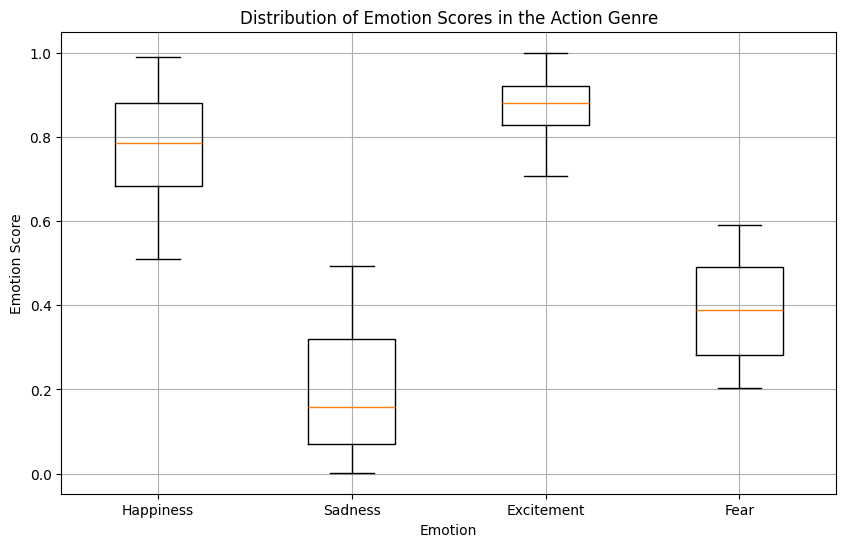

In [5]:
plt.figure(figsize=(10, 6))
plt.boxplot(emotions, labels=emotion_labels)
plt.title('Distribution of Emotion Scores in the Action Genre')
plt.ylabel('Emotion Score')
plt.xlabel('Emotion')
plt.grid(True)
plt.show()


### Method 3: Regression Analysis

The impact of emotions on the actor traits age and gender is analyzed using regression analysis. This method assesses relationships between the emotional tones of films and the age and gender of involved actors. Additionally, regression analysis may be used to explore connections between movie languages and emotional tones, complementing the chi-squared test described below.


### Mathematical notation
The regression model to analyze the impact of emotions on actor traits (age and gender) and movie language can be expressed as follows:

begin{equation*}
	\begin{aligned}
    Y = \beta_0 + \beta_1 \times X_1 + \beta_2 \times X_2 + ... + \beta_n \times X_n  + \epsilon  
    \end{aligned}
\end{equation*}

Where: <br>
$\ Y$ is the Dependent Variable <br>
$\ X_i$ are the independent variables (the emotion score of emotion $i$ )<br>
$\beta_i$ are the coefficients for emotion $i$ <br>
$n$ is the number of emotions


begin{equation*}
	\begin{aligned}
    Y = \beta_0 + \beta_1 \times \text{Age} + \beta_2 \times \text{Gender} + \beta_3 \times \text{Spanish} + \beta_4 \times \text{French} + \epsilon
\end{aligned}
\end{equation*}

By analyzing the coefficient see the influence of each variable X_i on the dependent variable Y. The sign of the coefficient tells us if the influence is positive or negative. 

When modelling age, gender and language as the dependend variable when need to take into account their variable type. While age is continuously and can be modelled with the expression obove, gender is a binary variable and language categorial. 

For the binary variable gender we use logistic regression:

begin{equation*}
	\begin{aligned}
        \log\left(\frac{P(Y = 1)}{P(Y = 0)}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n
    \end{aligned}
\end{equation*}


Where $Y = 1$ indicates female, and $Y = 0$ indicates male. The probability that $Y$ is female is given by:

begin{equation*}
	\begin{aligned}
        P(Y = 1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n)}}
    \end{aligned}
\end{equation*}

To obtain the coefficients that fit best to the date linear regression typically uses ordinary least squares. Logistic regression can be solved with Maximum Likelihood Estimation.

Logistic Regression:  The objective is to maximize the log-likelihood   $\max_{\beta} \ell(\beta))$

Linear Regression: The objective is to minimize the cost Function $J(\beta)$ based on Ordinary Least Square $J\min_{\beta} J(\beta)$